# Pipeline for the anomaly detection on the SKAB using ARIMA fault detection algorithm

Details regarding the SKAB one can find in the [SKAB repository](https://github.com/waico/SKAB).

The idea behind this algorithm is to use ARIMA weights as features for the anomaly detection algorithm. Using discrete differences of weight coefficients for different heuristic methods for obtaining function, which characterized the state (anomaly, not anomaly) using a threshold. 

Links at [PyPi](https://pypi.org/project/arimafd/), [GitHub](https://github.com/waico/arimafd) and [paper](https://waico.ru)

In [1]:
# libraries importing
import sys
import warnings

import pandas as pd
from arimafd import Arima_anomaly_detection

sys.path.append("..")
from core.metrics import chp_score
from core.utils import load_preprocess_skab, plot_results

warnings.filterwarnings("ignore", category=UserWarning)

## Data

In [2]:
Xy_traintest_list = load_preprocess_skab()

## Method

In [3]:
predicted_outlier, predicted_cp = [], []
true_outlier, true_cp = [], []
for X_train, X_test, y_train, y_test in Xy_traintest_list:
    model = Arima_anomaly_detection()
    model.fit(X_train)
    prediction = pd.Series(
        model.predict(X_test),
        index=X_test.index,
    )

    # predicted outliers saving
    predicted_outlier.append(prediction)

    # predicted CPs saving
    prediction_cp = prediction.rolling(30).max().fillna(0).diff().abs()
    prediction_cp[0] = prediction[0]
    predicted_cp.append(prediction_cp)

    true_outlier.append(y_test["anomaly"])
    true_cp.append(y_test["changepoint"])

/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)


Time seconds: 1.8761208057403564
Time seconds: 1.8522422313690186
Time seconds: 1.9046368598937988
Time seconds: 2.0031349658966064
Time seconds: 2.1202380657196045
Time seconds: 2.2488720417022705
Time seconds: 2.2845871448516846
Time seconds: 2.5176429748535156


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 2.3534421920776367
Time seconds: 2.160529136657715
Time seconds: 3.6359169483184814
Time seconds: 5.928740739822388
Time seconds: 5.764714002609253
Time seconds: 4.890947103500366
Time seconds: 4.642960786819458
Time seconds: 5.359097003936768


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 5.29212498664856
Time seconds: 5.356103181838989
Time seconds: 5.205494165420532
Time seconds: 3.806251049041748
Time seconds: 3.2641940116882324
Time seconds: 2.113152027130127
Time seconds: 2.3718700408935547
Time seconds: 2.2297632694244385


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 2.15482497215271
Time seconds: 2.101541757583618
Time seconds: 2.11942195892334
Time seconds: 4.808275938034058
Time seconds: 5.019596099853516
Time seconds: 5.426880121231079
Time seconds: 5.4721128940582275
Time seconds: 4.450735092163086


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 5.5978922843933105
Time seconds: 5.120151042938232
Time seconds: 5.131779909133911
Time seconds: 4.236736059188843
Time seconds: 3.149770975112915
Time seconds: 2.1263928413391113
Time seconds: 2.1531617641448975
Time seconds: 2.186161994934082


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 2.205976963043213
Time seconds: 2.114767074584961
Time seconds: 2.259657144546509
Time seconds: 4.445317268371582
Time seconds: 5.628083944320679
Time seconds: 5.4835309982299805
Time seconds: 5.2836833000183105
Time seconds: 5.0952489376068115


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 5.412930011749268
Time seconds: 4.7389137744903564
Time seconds: 5.106571912765503
Time seconds: 3.0267510414123535
Time seconds: 2.858275890350342
Time seconds: 2.1518900394439697
Time seconds: 2.108808994293213
Time seconds: 2.1568520069122314


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 3.2944650650024414
Time seconds: 4.991118669509888
Time seconds: 4.589199781417847
Time seconds: 4.631239891052246
Time seconds: 4.5251781940460205
Time seconds: 4.761360168457031
Time seconds: 4.518712043762207
Time seconds: 4.906160831451416


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 2.746511220932007
Time seconds: 1.9302551746368408
Time seconds: 1.7588319778442383
Time seconds: 1.9523520469665527
Time seconds: 1.7758729457855225
Time seconds: 1.8280229568481445
Time seconds: 1.973228931427002
Time seconds: 2.277308940887451


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 4.5684332847595215
Time seconds: 4.77592134475708
Time seconds: 4.780105829238892
Time seconds: 2.4574828147888184
Time seconds: 2.4955270290374756
Time seconds: 1.7422690391540527
Time seconds: 1.9863090515136719
Time seconds: 1.7798409461975098


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.9102611541748047
Time seconds: 1.938344955444336
Time seconds: 4.216105937957764
Time seconds: 5.188731908798218
Time seconds: 4.87577486038208
Time seconds: 5.209053993225098
Time seconds: 4.800894260406494
Time seconds: 4.580979824066162


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 2.4747798442840576
Time seconds: 1.8292150497436523
Time seconds: 1.8185651302337646
Time seconds: 2.1846981048583984
Time seconds: 1.8956291675567627
Time seconds: 1.782909870147705
Time seconds: 4.223495960235596
Time seconds: 5.4364333152771


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 4.247793197631836
Time seconds: 2.853463888168335
Time seconds: 1.9793570041656494
Time seconds: 1.794701099395752
Time seconds: 1.8928837776184082
Time seconds: 1.7360191345214844
Time seconds: 1.861400842666626
Time seconds: 1.9893362522125244


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 5.460658311843872
Time seconds: 4.628917694091797
Time seconds: 3.9726619720458984
Time seconds: 2.213765859603882
Time seconds: 1.6701462268829346
Time seconds: 1.6431968212127686
Time seconds: 1.7300221920013428
Time seconds: 1.6892082691192627


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 5.099290132522583
Time seconds: 4.495621681213379
Time seconds: 4.630115985870361
Time seconds: 4.7559638023376465
Time seconds: 4.65366792678833
Time seconds: 4.73173189163208
Time seconds: 2.7110238075256348
Time seconds: 1.7992959022521973


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.7809948921203613
Time seconds: 2.6240997314453125
Time seconds: 5.2645041942596436
Time seconds: 4.579172849655151
Time seconds: 4.996435880661011
Time seconds: 4.864876985549927
Time seconds: 5.026111841201782
Time seconds: 3.7694530487060547


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.8920199871063232
Time seconds: 1.8754661083221436
Time seconds: 1.8355262279510498
Time seconds: 1.7259979248046875
Time seconds: 2.7428359985351562
Time seconds: 4.75904107093811
Time seconds: 4.739362001419067
Time seconds: 5.326931953430176


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.7809841632843018
Time seconds: 1.8432188034057617
Time seconds: 1.7745270729064941
Time seconds: 1.8590288162231445
Time seconds: 1.772698163986206
Time seconds: 4.809983015060425
Time seconds: 4.98221230506897
Time seconds: 4.919857978820801


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 2.779263973236084
Time seconds: 1.782728910446167
Time seconds: 1.8083229064941406
Time seconds: 1.7687501907348633
Time seconds: 1.7137479782104492
Time seconds: 1.8017852306365967
Time seconds: 1.7533140182495117
Time seconds: 2.050611972808838


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 2.636519193649292
Time seconds: 1.8342130184173584
Time seconds: 1.8277392387390137
Time seconds: 1.7093889713287354
Time seconds: 1.8161687850952148
Time seconds: 1.7483079433441162
Time seconds: 1.8417611122131348
Time seconds: 1.7348310947418213


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 2.485056161880493
Time seconds: 2.5481605529785156
Time seconds: 1.8257429599761963
Time seconds: 1.7443461418151855
Time seconds: 1.7130041122436523
Time seconds: 1.7976679801940918
Time seconds: 1.842139720916748
Time seconds: 1.7683959007263184


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.7924368381500244
Time seconds: 1.8226239681243896
Time seconds: 1.6535708904266357
Time seconds: 1.682995080947876
Time seconds: 1.7306077480316162
Time seconds: 1.7296371459960938
Time seconds: 1.7584991455078125
Time seconds: 1.6887497901916504


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.6864690780639648
Time seconds: 1.8512029647827148
Time seconds: 1.7643451690673828
Time seconds: 1.623533010482788
Time seconds: 1.6657259464263916
Time seconds: 1.7920019626617432
Time seconds: 1.7409050464630127
Time seconds: 1.683305025100708


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.6327450275421143
Time seconds: 1.8483059406280518
Time seconds: 2.0601329803466797
Time seconds: 2.0103092193603516
Time seconds: 1.8772499561309814
Time seconds: 1.863036870956421
Time seconds: 1.8962738513946533
Time seconds: 1.8316009044647217


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.96116304397583
Time seconds: 2.0181522369384766
Time seconds: 1.9734258651733398
Time seconds: 1.7091221809387207
Time seconds: 1.7789878845214844
Time seconds: 1.7975127696990967
Time seconds: 1.843682050704956
Time seconds: 1.9042577743530273


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.988921880722046
Time seconds: 1.8466339111328125
Time seconds: 1.6925179958343506
Time seconds: 1.7547111511230469
Time seconds: 1.7628931999206543
Time seconds: 1.7351629734039307
Time seconds: 1.8181359767913818
Time seconds: 1.7668638229370117


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.8353288173675537
Time seconds: 2.081977128982544
Time seconds: 1.89631986618042
Time seconds: 1.846815824508667
Time seconds: 1.79347825050354
Time seconds: 1.7137808799743652
Time seconds: 1.8073639869689941
Time seconds: 2.0566070079803467


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 2.1119110584259033
Time seconds: 1.98848295211792
Time seconds: 2.139522075653076
Time seconds: 2.145001173019409
Time seconds: 2.058400869369507
Time seconds: 2.022141933441162
Time seconds: 2.218951940536499
Time seconds: 2.0166749954223633


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.955502986907959
Time seconds: 1.8674077987670898
Time seconds: 1.7426187992095947
Time seconds: 1.8432340621948242
Time seconds: 1.731266736984253
Time seconds: 1.718033790588379
Time seconds: 1.7348949909210205
Time seconds: 1.8834149837493896


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.660825252532959
Time seconds: 1.8042690753936768
Time seconds: 1.8287148475646973
Time seconds: 1.7533509731292725
Time seconds: 1.733854055404663
Time seconds: 1.8449561595916748
Time seconds: 1.8657071590423584
Time seconds: 1.8347182273864746


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.989283800125122
Time seconds: 1.8173010349273682
Time seconds: 1.76359224319458
Time seconds: 1.8898708820343018
Time seconds: 1.7930829524993896
Time seconds: 1.9278078079223633
Time seconds: 1.7691400051116943
Time seconds: 1.8677799701690674


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.8107800483703613
Time seconds: 1.8006620407104492
Time seconds: 1.8557651042938232
Time seconds: 1.8200569152832031
Time seconds: 1.7421250343322754
Time seconds: 1.7234947681427002
Time seconds: 1.9881176948547363
Time seconds: 1.7334368228912354


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.860931158065796
Time seconds: 1.8373854160308838
Time seconds: 1.7943618297576904
Time seconds: 1.7836930751800537
Time seconds: 1.7730178833007812
Time seconds: 1.7648589611053467
Time seconds: 1.861008882522583
Time seconds: 1.856579065322876


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

Time seconds: 1.9075722694396973
Time seconds: 1.7674880027770996
Time seconds: 1.7663850784301758
Time seconds: 1.7779147624969482
Time seconds: 1.814319133758545
Time seconds: 1.7391431331634521
Time seconds: 1.7908039093017578
Time seconds: 1.8700900077819824


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/arimafd/tanh.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)


### Results visualization

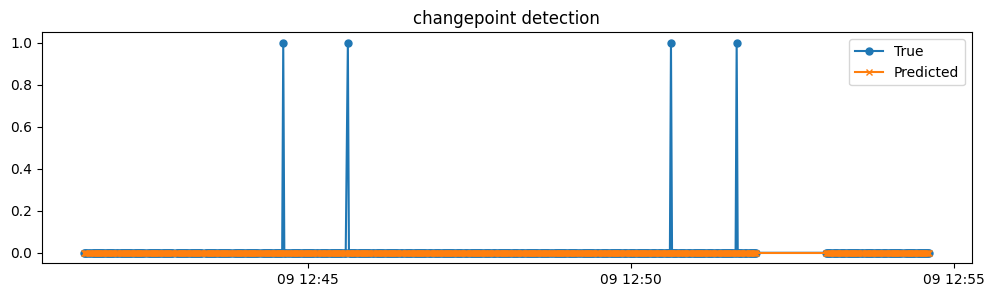

In [4]:
# [donotremove]
plot_results(
    (true_cp[1], predicted_cp[1]),
)

## Evaluation (metrics calculation)

In [5]:
import pickle

pickle.dump(
    predicted_outlier, open(f"results-{model.__class__.__name__}.pkl", "wb")
)

### Binary classification (outlier detection) metrics

In [11]:
# [donotremove]
# binary classification metrics calculation
binary = chp_score(true_outlier, predicted_outlier, metric="binary")

False Alarm Rate 0.01 %
Missing Alarm Rate 100.0 %
F1 metric 0.0


not implemented

### Changepoint detection metrics

In [6]:
# [donotremove]
# average detection delay metric calculation
add = chp_score(
    true_cp,
    predicted_cp,
    metric="average_time",
    window_width="60s",
    anomaly_window_destination="righter",
)

Amount of true anomalies 127
A number of missed CPs = 127
A number of FPs = 2
Average time nan


/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mw/pyprojects/SKAB/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [13]:
# [donotremove]
# nab metric calculation
nab = chp_score(
    true_cp,
    predicted_cp,
    metric="nab",
    window_width="60s",
    anomaly_window_destination="righter",
)

Standard  -  -0.09
LowFP  -  -0.17
LowFN  -  -0.06
